In [ ]:
#Details: This source code is for publised work: Gopal Chandra Jana, Mogullapally Sai Praneeth and Anupam Agrawal"A Multi-View SVM Approach for Seizure Detection from Single Channel EEG signals" 
IETE Journal of Research,Taylor & Francis, DOI: https://doi.org/10.1080/03772063.2021.1913074.

All coyright(including figures) resived of by: IETE Journal of Research,Taylor & Francis
#Authors Affiliation: IIIT Allahabad, IIT Bhubaneswar
#mail : gcjana@gcjana.in, msp10@iitbbs.ac.in
Cite as: 


In [ ]:
  # download the data from university of Bonn
  !wget http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/Z.zip  # Set A
  !wget http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/O.zip  # Set B
  !wget http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/N.zip  # Set C
  !wget http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/F.zip  # Set D
  !wget http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/S.zip  # Set E

  !unzip Z.zip -d 'Set A'
  !unzip O.zip -d 'Set B'
  !unzip N.zip -d 'Set C'
  !unzip F.zip -d 'Set D'
  !unzip S.zip -d 'Set E'

--2020-10-04 15:56:39--  http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/Z.zip
Resolving epileptologie-bonn.de (epileptologie-bonn.de)... 83.169.36.208
Connecting to epileptologie-bonn.de (epileptologie-bonn.de)|83.169.36.208|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 578047 (564K) [application/zip]
Saving to: ‘Z.zip’

Z.zip               100%[===================>] 564.50K   300KB/s    in 1.9s    

2020-10-04 15:56:42 (300 KB/s) - ‘Z.zip’ saved [578047/578047]

--2020-10-04 15:56:42--  http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/O.zip
Resolving epileptologie-bonn.de (epileptologie-bonn.de)... 83.169.36.208
Connecting to epileptologie-bonn.de (epileptologie-bonn.de)|83.169.36.208|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625970 (611K) [application/zip]
Saving to: ‘O.zip’

O.zip               100%[===================>] 611.30K   359KB/s    in 1.7s    

2020-10-04 15:56:44 (359 KB/s) - ‘O.zip’ saved [62

In [ ]:
# import the necessary packages
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import os 
from tqdm import tqdm

In [ ]:
# run this when doing A vs E , B vs E  , AB vs E , C vs E , D vs E , CD vs E 
DATA_DIR_A = './Set A/'
DATA_DIR_B = './Set B/'
DATA_DIR_C = './Set C/'
DATA_DIR_D = './Set D/'
DATA_DIR_E = './Set E/'

#data 1 will contain A,B files
#data 2 will contain C,D files
#data 3 will contain E file 


data1 = []
data2 = []
data3 = []
nbFiles = 0 

# for getting file A in data1 , uncomment when in use
#for fname in tqdm(os.listdir(DATA_DIR_A)):
 # img =  np.loadtxt(DATA_DIR_A + fname)
  #data1.append([img])
  #nbFiles+=1

# for getting file B in data1 , uncomment when in use
for fname in tqdm(os.listdir(DATA_DIR_B)):
  img =  np.loadtxt(DATA_DIR_B + fname)
  data1.append([img])
  nbFiles+=1

# for getting file C in data2 , uncomment when in use
#for fname in tqdm(os.listdir(DATA_DIR_C)):
 # img =  np.loadtxt(DATA_DIR_C + fname)
 # data2.append([img])
 # nbFiles+=1

# for getting file D in data2 , uncomment when in use
#for fname in tqdm(os.listdir(DATA_DIR_D)):
 # img =  np.loadtxt(DATA_DIR_D + fname)
 #data2.append([img])
 # nbFiles+=1

# for getting file E in data3 , uncomment when in use
for fname in tqdm(os.listdir(DATA_DIR_E)):
  img =  np.loadtxt(DATA_DIR_E + fname)
  data3.append([img])
  nbFiles+=1      

100%|██████████| 100/100 [00:01<00:00, 78.81it/s]


In [ ]:
# This should be run only when ABCD vs E is done and for plotting 
DATA_DIR_A = './Set A/'
DATA_DIR_B = './Set B/'
DATA_DIR_C = './Set C/'
DATA_DIR_D = './Set D/'
DATA_DIR_E = './Set E/'


#data 2 will contain A,B,C,D files
#data 3 will contain E file 


data2 = []
data3 = []
nbFiles = 0 

 
for fname in tqdm(os.listdir(DATA_DIR_A)):
  img =  np.loadtxt(DATA_DIR_A + fname)
  data2.append([img])
  nbFiles+=1


for fname in tqdm(os.listdir(DATA_DIR_B)):
  img =  np.loadtxt(DATA_DIR_B + fname)
  data2.append([img])
  nbFiles+=1


for fname in tqdm(os.listdir(DATA_DIR_C)):
  img =  np.loadtxt(DATA_DIR_C + fname)
  data2.append([img])
  nbFiles+=1


for fname in tqdm(os.listdir(DATA_DIR_D)):
  img =  np.loadtxt(DATA_DIR_D + fname)
  data2.append([img])
  nbFiles+=1


for fname in tqdm(os.listdir(DATA_DIR_E)):
  img =  np.loadtxt(DATA_DIR_E + fname)
  data3.append([img])
  nbFiles+=1      

100%|██████████| 100/100 [00:01<00:00, 79.43it/s]


In [ ]:
# converting the extracted data into array
# depending on case, not in use code must be commented ( For example when comparing AB vs E , data2 must be commented)
#data1 = np.array([d[0] for d in data1])
data2 = np.array([d[0] for d in data2])
data3 = np.array([d[0] for d in data3])

In [ ]:
# X1 is list which will contain set A,B i,e data1
X1 = []
Y1 = []
b = 178
for i in range(data1.shape[0]):
  for w in np.arange(0,4094,178):
    X1.append([data1[i,w:w+b]])

In [ ]:
# X2 is list which will contain set C,D i,e data2
X2 = []
Y2 = []
b = 178
for i in range(data2.shape[0]):
  for w in np.arange(0,4094,178):
    X2.append([data2[i,w:w+b]])

In [ ]:
# X3 is list which will contain set E i,e data3
X3 = []
Y3 = []
b = 178
for i in range(data3.shape[0]):
  for w in np.arange(0,4094,178):
    X3.append([data3[i,w:w+b]])

In [ ]:
# converting the extracted data into array
# depending the case , remaining code must be commented ( For example when comparing AB vs E , X2 must be commented)
#X1 = np.array([d[0] for d in X1])
X2 = np.array([d[0] for d in X2])
X3 = np.array([d[0] for d in X3])

In [ ]:
X2.shape

(9200, 178)

In [ ]:
X3.shape

(2300, 178)

In [ ]:
# Y value takes -1 for non-seizure and 1 for seizure

In [ ]:
#Y1 = np.zeros((X1.shape[0],1))
Y2 = np.zeros((X2.shape[0],1))
Y3 = np.zeros((X3.shape[0],1))
#Y1 = Y1 - 1
Y2 = Y2 - 1
#Y2 = Y2 + 1
Y3 = Y3 + 1

In [ ]:
Y2[0]

array([-1.])

In [ ]:
# concatenating the two sets which are in use ( concatenate X1 , X3 if AvsE or B vs E or AB vs E) remaining concatenate X2,X3

In [ ]:
#X = np.concatenate((X1,X3) , axis = 0)
X = np.concatenate((X2,X3), axis = 0)

In [ ]:
#Y = np.concatenate((Y1 , Y3) , axis = 0)
Y = np.concatenate((Y2 ,Y3), axis =0)

In [ ]:
Y.shape

(11500, 1)

In [ ]:
from scipy.signal import butter,lfilter

In [ ]:
fs = 173.61
cutoff = 40 #Hz
nq = 0.5 * fs
ncutoff = cutoff/nq
b,a = butter(5,ncutoff,btype = 'low')
# we have created a butter worth low pass filter of order 5 , with cutoff frequency 40Hz

In [ ]:
# this is for creating the X array in next steps
size = Y.shape[0]

In [ ]:
X_new  = []
#butter worth coefficients are already created
for i in range(X.shape[0]):
  X_new.append([lfilter(b,a,X[i])])


In [ ]:
X_new = np.array([X_new])
X = np.reshape(X_new , (size,178))

In [ ]:
# done filtering the signals

In [ ]:
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler
from scipy.signal import welch

In [ ]:
# function for created ICA features , using fastICA library in python
def featuresICA(X_train,X_test):
  ica = FastICA(n_components = 100,)
  X_train1 = ica.fit_transform(X_train)
  X_test1 = ica.transform(X_test)
  sc1 = StandardScaler()
  X_train1 = sc1.fit_transform(X_train1)
  X_test1 = sc1.transform(X_test1)

  return X_train1,X_test1 

In [ ]:
#function for creating 'psd' features, we use the inbuilt welch function for this 
def featurespsds(X_train,X_test):
  psds = []
  for i in range(X_train.shape[0]):
    freqs,psd = welch(X_train[i],fs = 173.61)
    psds.append([psd[1:55]])

  X_train2 = np.array(psds)  
  X_train2 = np.reshape(X_train2,(X_train1.shape[0],54))

  psds = []
  for i in range(X_test.shape[0]):
    freqs,psd = welch(X_test[i],fs = 173.61)
    psds.append([psd[1:55]])
  
  X_test2 = np.array(psds)   
  X_test2 = np.reshape(X_test2,(X_test1.shape[0],54))  

  # let us scale
  sc2 = StandardScaler()
  X_train2 = sc2.fit_transform(X_train2)
  X_test2 = sc2.transform(X_test2)
  #done scaling

  return X_train2 , X_test2


In [ ]:
#only for plotting run the next three tabs
# set A - 0 to 2300 
# set B - 2300 to 4600
# set C - 4600 to 6900 
# set D - 6900 to 9200 
# set E - 9200 to 12500 

sample_num = 2000 # example

In [ ]:
X_train1 , X_test1 = featuresICA(X,X)
X_train2 , X_test2 = featurespsds(X,X)

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


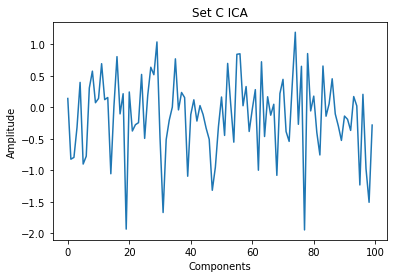

In [ ]:
plt.plot(X_train1[sample_num])
plt.title('Set C ICA')
plt.ylabel('Amplitude')
plt.xlabel('Components')
plt.savefig('SetC_ICA.png')  

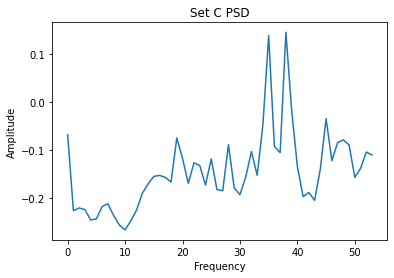

In [ ]:
plt.plot(X_train2[sample_num])
plt.title('Set C PSD')
plt.ylabel('Amplitude')
plt.xlabel('Frequency')
plt.savefig('SetC_PSD.png')  

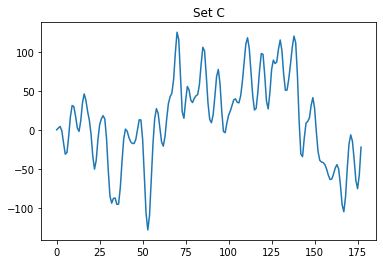

In [ ]:
plt.plot(X[sample_num])
plt.title('Set C')
#plt.ylabel('Amplitude')
#plt.xlabel('Time')
plt.savefig('SetC.png')  

In [ ]:
X.shape

(4600, 178)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
# this method to find weights W1 , W2 as mentioned in paper
def findweights(X_test1,X_test2):
  acc = 0 
  W1 = 0 
  W2 = 0
  ma = 0 
  for i in np.arange(0,1,0.02):
    Ypred = newmodel.predict([X_test1,X_test2])
    Ypred = (i*Ypred[:,0] + (1-i)*Ypred[:,1])
    Ypred = np.where(Ypred>=0,1,-1)
    acc = accuracy_score(y_test,Ypred)
    if ma <= acc :
      ma = acc
      W1 = i 
      W2 = 1 - i 


  return W1 ,W2     

In [ ]:
# this is a function to find the threshold as mentioned in paper
def findthrs(y_test,Ypred):
  fpr , tpr , thrs = roc_curve(y_test ,Ypred )
  ma = 0 
  for i in range(thrs.shape[0]):
    Ypred = newmodel.predict([X_test1,X_test2])
    Ypred = (0*Ypred[:,0] +1* Ypred[:,1])
    Ypred = np.where(Ypred>=thrs[i],1,-1)
    acc = accuracy_score(y_test,Ypred)
    if ma< acc:
      ma = acc
      threshold = thrs[i]

  return threshold 

In [ ]:
# function for finding area under curve value (AUC)
def findauc(Ypred , y_test):
  precision , recall , thrs = precision_recall_curve(y_test  , Ypred)
  a = auc(recall,precision)
  

  return a 

In [ ]:
# time for multi view svm
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

In [ ]:
# importing necessary packages
from keras import *
from keras.models import Model
from keras.layers import concatenate
from keras.layers import Dense
from keras import regularizers
from keras.layers import Activation

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [ ]:
# implenting the cost function as mentioned in the paper

In [ ]:
import keras.backend as kb
def custom_loss_function(y_actual ,ypred):
  loss =  kb.sum(kb.maximum(0.0,1.- (y_actual * ypred)))

  y1 = ypred[:,0]
  y2 = ypred[:,1]
  m1 = kb.greater(kb.abs(y2-y1),1)
  

  extra = 0 
  # this is the additional reguralization term as mentioned in the paper
  extra = kb.sum(kb.switch(m1,kb.abs(y2-y1),0))

  loss  = loss +(0.001)* extra
  

  return loss 


In [ ]:
# implementing the multi-view SVM model using keras
# we have added  weight regularization term as mentioned in paper

In [ ]:

model1 = Sequential()
model1.add(Dense(1,input_dim = 100 , activation = 'linear',bias_initializer=initializers.Constant(0.01)))

model2 = Sequential()
model2.add(Dense(1,input_dim = 54 ,activation = 'linear',bias_initializer=initializers.Constant(0.01)))

mergedout = concatenate([model1.output,model2.output])

newmodel = Model([model1.input , model2.input],mergedout)

newmodel.compile(loss =custom_loss_function , optimizer = 'SGD')

In [ ]:
# using stratified shuffle split , we do K-fold crossvalidation , in each fold we have equal number of positive(1) and negative(-1) samples
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
ss = StratifiedShuffleSplit(n_splits=10,test_size = 0.3,random_state= 0 )

In [ ]:
# initialize these values before running the loop
# initializing metrics
accuracy = 0 
sensitivity = 0 
specificity = 0 
f1score = 0
auc_score =  0 

iteration 0


/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 178, using nperseg = 178
  .format(nperseg, input_length))


Epoch 1/50
3220/3220 [==============================] - 0s 132us/step - loss: 28.3560
Epoch 2/50
3220/3220 [==============================] - 0s 50us/step - loss: 24.9867
Epoch 3/50
3220/3220 [==============================] - 0s 45us/step - loss: 24.8014
Epoch 4/50
3220/3220 [==============================] - 0s 46us/step - loss: 24.5662
Epoch 5/50
3220/3220 [==============================] - 0s 45us/step - loss: 24.7417
Epoch 6/50
3220/3220 [==============================] - 0s 47us/step - loss: 24.0235
Epoch 7/50
3220/3220 [==============================] - 0s 46us/step - loss: 23.8932
Epoch 8/50
3220/3220 [==============================] - 0s 47us/step - loss: 24.5640
Epoch 9/50
3220/3220 [==============================] - 0s 47us/step - loss: 23.7792
Epoch 10/50
3220/3220 [==============================] - 0s 47us/step - loss: 23.9929
Epoch 11/50
3220/3220 [==============================] - 0s 47us/step - loss: 23.5500
Epoch 12/50
3220/3220 [==============================] - 0s 50

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 178, using nperseg = 178
  .format(nperseg, input_length))


Epoch 1/50
3220/3220 [==============================] - 0s 48us/step - loss: 25.1456
Epoch 2/50
3220/3220 [==============================] - 0s 47us/step - loss: 24.4723
Epoch 3/50
3220/3220 [==============================] - 0s 46us/step - loss: 24.4911
Epoch 4/50
3220/3220 [==============================] - 0s 49us/step - loss: 24.5488
Epoch 5/50
3220/3220 [==============================] - 0s 47us/step - loss: 24.4540
Epoch 6/50
3220/3220 [==============================] - 0s 47us/step - loss: 24.4445
Epoch 7/50
3220/3220 [==============================] - 0s 53us/step - loss: 24.2899
Epoch 8/50
3220/3220 [==============================] - 0s 47us/step - loss: 24.4532
Epoch 9/50
3220/3220 [==============================] - 0s 50us/step - loss: 24.6054
Epoch 10/50
3220/3220 [==============================] - 0s 48us/step - loss: 24.3438
Epoch 11/50
3220/3220 [==============================] - 0s 46us/step - loss: 24.5536
Epoch 12/50
3220/3220 [==============================] - 0s 46u

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 178, using nperseg = 178
  .format(nperseg, input_length))


Epoch 1/50
3220/3220 [==============================] - 0s 49us/step - loss: 24.1876
Epoch 2/50
3220/3220 [==============================] - 0s 48us/step - loss: 24.0685
Epoch 3/50
3220/3220 [==============================] - 0s 48us/step - loss: 24.0068
Epoch 4/50
3220/3220 [==============================] - 0s 51us/step - loss: 24.0611
Epoch 5/50
3220/3220 [==============================] - 0s 49us/step - loss: 24.1843
Epoch 6/50
3220/3220 [==============================] - 0s 47us/step - loss: 24.0483
Epoch 7/50
3220/3220 [==============================] - 0s 47us/step - loss: 23.6315
Epoch 8/50
3220/3220 [==============================] - 0s 49us/step - loss: 23.9446
Epoch 9/50
3220/3220 [==============================] - 0s 51us/step - loss: 24.1780
Epoch 10/50
3220/3220 [==============================] - 0s 49us/step - loss: 23.5764
Epoch 11/50
3220/3220 [==============================] - 0s 49us/step - loss: 23.4740
Epoch 12/50
3220/3220 [==============================] - 0s 48u

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 178, using nperseg = 178
  .format(nperseg, input_length))


Epoch 1/50
3220/3220 [==============================] - 0s 55us/step - loss: 25.0925
Epoch 2/50
3220/3220 [==============================] - 0s 48us/step - loss: 24.0394
Epoch 3/50
3220/3220 [==============================] - 0s 47us/step - loss: 24.1415
Epoch 4/50
3220/3220 [==============================] - 0s 50us/step - loss: 24.5979
Epoch 5/50
3220/3220 [==============================] - 0s 49us/step - loss: 24.4734
Epoch 6/50
3220/3220 [==============================] - 0s 47us/step - loss: 24.2694
Epoch 7/50
3220/3220 [==============================] - 0s 49us/step - loss: 24.1848
Epoch 8/50
3220/3220 [==============================] - 0s 50us/step - loss: 24.6451
Epoch 9/50
3220/3220 [==============================] - 0s 47us/step - loss: 24.2141
Epoch 10/50
3220/3220 [==============================] - 0s 53us/step - loss: 23.8653
Epoch 11/50
3220/3220 [==============================] - 0s 47us/step - loss: 23.8922
Epoch 12/50
3220/3220 [==============================] - 0s 51u

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 178, using nperseg = 178
  .format(nperseg, input_length))


Epoch 1/50
3220/3220 [==============================] - 0s 51us/step - loss: 24.2347
Epoch 2/50
3220/3220 [==============================] - 0s 49us/step - loss: 23.9741
Epoch 3/50
3220/3220 [==============================] - 0s 47us/step - loss: 23.6475
Epoch 4/50
3220/3220 [==============================] - 0s 51us/step - loss: 24.5557
Epoch 5/50
3220/3220 [==============================] - 0s 47us/step - loss: 24.0737
Epoch 6/50
3220/3220 [==============================] - 0s 47us/step - loss: 24.3615
Epoch 7/50
3220/3220 [==============================] - 0s 49us/step - loss: 24.3317
Epoch 8/50
3220/3220 [==============================] - 0s 49us/step - loss: 24.0051
Epoch 9/50
3220/3220 [==============================] - 0s 46us/step - loss: 24.0833
Epoch 10/50
3220/3220 [==============================] - 0s 46us/step - loss: 23.9989
Epoch 11/50
3220/3220 [==============================] - 0s 53us/step - loss: 23.8567
Epoch 12/50
3220/3220 [==============================] - 0s 50u

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 178, using nperseg = 178
  .format(nperseg, input_length))


Epoch 1/50
3220/3220 [==============================] - 0s 50us/step - loss: 24.7905
Epoch 2/50
3220/3220 [==============================] - 0s 49us/step - loss: 23.9391
Epoch 3/50
3220/3220 [==============================] - 0s 50us/step - loss: 24.4267
Epoch 4/50
3220/3220 [==============================] - 0s 48us/step - loss: 24.4962
Epoch 5/50
3220/3220 [==============================] - 0s 49us/step - loss: 24.1183
Epoch 6/50
3220/3220 [==============================] - 0s 46us/step - loss: 24.4686
Epoch 7/50
3220/3220 [==============================] - 0s 47us/step - loss: 23.8869
Epoch 8/50
3220/3220 [==============================] - 0s 55us/step - loss: 24.3607
Epoch 9/50
3220/3220 [==============================] - 0s 48us/step - loss: 24.0107
Epoch 10/50
3220/3220 [==============================] - 0s 48us/step - loss: 24.0977
Epoch 11/50
3220/3220 [==============================] - 0s 52us/step - loss: 24.5087
Epoch 12/50
3220/3220 [==============================] - 0s 51u

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 178, using nperseg = 178
  .format(nperseg, input_length))


Epoch 1/50
3220/3220 [==============================] - 0s 48us/step - loss: 24.0993
Epoch 2/50
3220/3220 [==============================] - 0s 47us/step - loss: 23.7198
Epoch 3/50
3220/3220 [==============================] - 0s 46us/step - loss: 23.5552
Epoch 4/50
3220/3220 [==============================] - 0s 47us/step - loss: 23.1782
Epoch 5/50
3220/3220 [==============================] - 0s 46us/step - loss: 23.4513
Epoch 6/50
3220/3220 [==============================] - 0s 45us/step - loss: 23.4892
Epoch 7/50
3220/3220 [==============================] - 0s 45us/step - loss: 23.9177
Epoch 8/50
3220/3220 [==============================] - 0s 51us/step - loss: 23.3648
Epoch 9/50
3220/3220 [==============================] - 0s 47us/step - loss: 23.6644
Epoch 10/50
3220/3220 [==============================] - 0s 47us/step - loss: 23.5565
Epoch 11/50
3220/3220 [==============================] - 0s 46us/step - loss: 23.4620
Epoch 12/50
3220/3220 [==============================] - 0s 47u

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 178, using nperseg = 178
  .format(nperseg, input_length))


Epoch 1/50
3220/3220 [==============================] - 0s 47us/step - loss: 24.6765
Epoch 2/50
3220/3220 [==============================] - 0s 46us/step - loss: 24.0375
Epoch 3/50
3220/3220 [==============================] - 0s 47us/step - loss: 23.9226
Epoch 4/50
3220/3220 [==============================] - 0s 48us/step - loss: 24.1041
Epoch 5/50
3220/3220 [==============================] - 0s 47us/step - loss: 23.9140
Epoch 6/50
3220/3220 [==============================] - 0s 46us/step - loss: 24.1980
Epoch 7/50
3220/3220 [==============================] - 0s 49us/step - loss: 23.9518
Epoch 8/50
3220/3220 [==============================] - 0s 45us/step - loss: 23.9341
Epoch 9/50
3220/3220 [==============================] - 0s 45us/step - loss: 23.7926
Epoch 10/50
3220/3220 [==============================] - 0s 50us/step - loss: 23.9158
Epoch 11/50
3220/3220 [==============================] - 0s 49us/step - loss: 24.0662
Epoch 12/50
3220/3220 [==============================] - 0s 47u

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 178, using nperseg = 178
  .format(nperseg, input_length))


Epoch 1/50
3220/3220 [==============================] - 0s 54us/step - loss: 24.5623
Epoch 2/50
3220/3220 [==============================] - 0s 47us/step - loss: 23.4305
Epoch 3/50
3220/3220 [==============================] - 0s 46us/step - loss: 23.9666
Epoch 4/50
3220/3220 [==============================] - 0s 47us/step - loss: 23.9584
Epoch 5/50
3220/3220 [==============================] - 0s 50us/step - loss: 23.8854
Epoch 6/50
3220/3220 [==============================] - 0s 50us/step - loss: 23.7561
Epoch 7/50
3220/3220 [==============================] - 0s 47us/step - loss: 23.6680
Epoch 8/50
3220/3220 [==============================] - 0s 48us/step - loss: 23.7356
Epoch 9/50
3220/3220 [==============================] - 0s 46us/step - loss: 23.7288
Epoch 10/50
3220/3220 [==============================] - 0s 50us/step - loss: 23.5725
Epoch 11/50
3220/3220 [==============================] - 0s 50us/step - loss: 23.8785
Epoch 12/50
3220/3220 [==============================] - 0s 49u

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 178, using nperseg = 178
  .format(nperseg, input_length))


Epoch 1/50
3220/3220 [==============================] - 0s 50us/step - loss: 24.1494
Epoch 2/50
3220/3220 [==============================] - 0s 47us/step - loss: 24.1129
Epoch 3/50
3220/3220 [==============================] - 0s 46us/step - loss: 23.9962
Epoch 4/50
3220/3220 [==============================] - 0s 50us/step - loss: 23.8246
Epoch 5/50
3220/3220 [==============================] - 0s 51us/step - loss: 23.8939
Epoch 6/50
3220/3220 [==============================] - 0s 48us/step - loss: 23.5326
Epoch 7/50
3220/3220 [==============================] - 0s 49us/step - loss: 23.8988
Epoch 8/50
3220/3220 [==============================] - 0s 49us/step - loss: 24.2359
Epoch 9/50
3220/3220 [==============================] - 0s 47us/step - loss: 24.0135
Epoch 10/50
3220/3220 [==============================] - 0s 48us/step - loss: 23.8503
Epoch 11/50
3220/3220 [==============================] - 0s 48us/step - loss: 23.9417
Epoch 12/50
3220/3220 [==============================] - 0s 49u

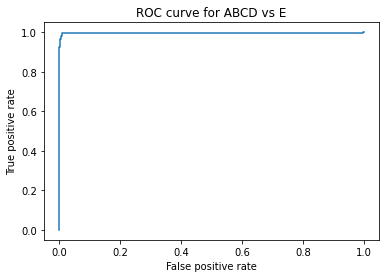

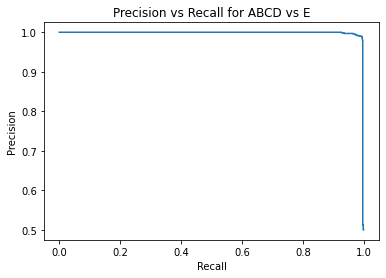

In [ ]:
# main function for implementing model
# the model is implemented in three phases as mentioned in paper
i = 0
# running for 10sets of data as splited by K-fold 
for train_index , test_index in ss.split(X,Y):
  print('iteration '+str(i))
  i+=1
  # phase 1 preparing data
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  X_train1,X_test1 = featuresICA(X_train,X_test)
  X_train2,X_test2 = featurespsds(X_train,X_test)
  # done preparing data
  #time to train
  # phase 2 training the model
  newmodel.fit([X_train1,X_train2],y_train,epochs = 50 , batch_size=20)
  # phase 3 tuning the model 
  W1,W2 = findweights(X_test1, X_test2)
  Ypred = newmodel.predict([X_test1,X_test2])
  Ypred = W1 * Ypred[:,0] + W2 * Ypred[:,1]
   
  # graphs (ROC , precision vs recall) are ploted in 10th step in 10-fold cross validation
  if i==10:
   
    fpr , tpr , thrs = roc_curve(y_test , Ypred)
    plt.plot(fpr , tpr)
    plt.title('ROC curve for ABCD vs E')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.savefig('ROC ABCD vs E.png')
    plt.show()

    precision , recall , thrs = precision_recall_curve(y_test  , Ypred)
    plt.plot(recall , precision)
    plt.title('Precision vs Recall for ABCD vs E')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.savefig('PvsR_ABCD vs E.png')   
    plt.show() 


    
  
  # finding values of different metrics mentioned in table[2] of paper
  # let us find precision and recall
  auc_score+=findauc(Ypred,y_test)
  #now lets find the best threshold value 
  threshold = findthrs(y_test,Ypred)
  Ypred = np.where(Ypred>=threshold,1,-1)
  # now let's evaluate the model
  # let's us find the confusion matrix from which we can find values
  cm = confusion_matrix(y_test,Ypred)
  specificity += cm[1][1]/(cm[0][1]+cm[1][1])
  sensitivity += cm[0][0]/(cm[0][0]+cm[1][0])
  accuracy += (cm[0][0] + cm[1][1])/(cm[0][0]+ cm[0][1] + cm[1][0] + cm[1][1])
  precision = (cm[0][0]/(cm[0][0]+cm[0][1]))
  recall = cm[1][1] /(cm[1][1]+cm[1][0])
  f1 = 2.0 * ( precision * recall)/(precision + recall)
  f1score+=f1

  
  

In [ ]:
 # these are the averaged values over 10 folds
accuracy = accuracy*10
sensitivity = sensitivity*10
specificity = specificity*10
f1score = f1score/10
auc_score = auc_score/10
print('Accuracy '+ str(accuracy))
print('Sensitivity  '+ str(sensitivity))
print('Specificity ' + str(specificity))
print('f1 score  '+ str(f1score))
print('auc value '+str(auc_score))

Accuracy 99.10144927536231
Sensitivity  99.34650258274311
Specificity 98.86093380672592
f1 score  0.9910028351323323
auc value 0.9991700762974007


In [ ]:
# comparing with single view SVM as mentione in paper
# importing packages related to single view SVM
# X,Y is data set
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , Y , test_size = 0.3)

In [ ]:
# get the two views using functions
X_train1 , X_test1 = featuresICA(X_train , X_test)
X_train2 , X_test2 = featurespsds(X_train , X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 178, using nperseg = 178
  .format(nperseg, input_length))


In [ ]:
#Time domain single view SVM
svm1 = SVC()
svm1.fit(X_train1 , y_train)
ypred1 = svm1.predict(X_test1)
print(100*accuracy_score(y_test , ypred1))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


89.4927536231884


In [ ]:
#Frequency domain single view SVM
svm2 = SVC()
svm2.fit(X_train2 , y_train)
ypred2 = svm2.predict(X_test2)
print(100*accuracy_score(y_test , ypred2))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


96.66666666666667


In [ ]:
# now let us concatenate both features and feed to a SVM
X_train_con = np.concatenate((X_train1 , X_train2) , axis = 1)
X_test_con = np.concatenate((X_test1 , X_test2) , axis = 1)
svm3 = SVC()
svm3.fit(X_train_con , y_train)
ypred3 = svm3.predict(X_test_con)
print(100*accuracy_score(y_test , ypred3))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


94.05797101449276
